<img src="https://i.esdrop.com/d/7o0dj05m8rnz/JNGCMedl18.png" width="45%">

# 분류 - 고객 성별 예측

#### 데이터 설명

|칼럼영|칼럼 설명|
|---|---|
|회원ID|회원고유번호|
|총구매액|총 구매금액(원)|
|최대구매액|구매건당 최대구매금액(원)|
|환불금액|환불금액(원)|
|주구매상품|주로 구매한 품목(42개 품목 범주)|
|주구매지점|주로 구매한 저점명(24개 저점 범부)|
|방문일수|고객이 방문한 일수(일)|
|방문당구매건수|총구매건수/방문일수|
|주말방문비율|주말에 방문한 비율|
|구매주기|구매 주기(일)|
|성별|고객 성별(0:여자, 1:남자)|

---

In [1]:
# Visual Python: Data Analysis > Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 데이터 읽기

In [2]:
# Visual Python: Data Analysis > File
df = pd.read_csv('./data/customer.csv')
df

,회원ID,총구매액,최대구매액,환불금액,주구매상품,주구매지점,방문일수,방문당구매건수,주말방문비율,구매주기,성별
0,0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,2,3197000,1639000,NaN,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,3,16077620,4935000,NaN,기타,광주점,18,2.444444,0.318182,16,1
4,4,29050000,24000000,NaN,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...,...
3495,3495,3175200,3042900,NaN,골프,본 점,1,2.000000,1.000000,0,1
3496,3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,3497,75000,75000,NaN,주방용품,창원점,1,1.000000,0.000000,0,0
3498,3498,1875000,1000000,NaN,화장품,본 점,2,1.000000,0.000000,39,0


In [3]:
# Visual Python: Data Analysis > Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회원ID     3500 non-null   int64  
 1   총구매액     3500 non-null   int64  
 2   최대구매액    3500 non-null   int64  
 3   환불금액     1205 non-null   float64
 4   주구매상품    3500 non-null   object 
 5   주구매지점    3500 non-null   object 
 6   방문일수     3500 non-null   int64  
 7   방문당구매건수  3500 non-null   float64
 8   주말방문비율   3500 non-null   float64
 9   구매주기     3500 non-null   int64  
 10  성별       3500 non-null   int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 300.9+ KB


In [4]:
# Visual Python: Data Analysis > Data Info
df.describe()

,회원ID,총구매액,최대구매액,환불금액,방문일수,방문당구매건수,주말방문비율,구매주기,성별
count,3500.000000,3.500000e+03,3.500000e+03,1.205000e+03,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,1749.500000,9.191925e+07,1.966424e+07,2.407822e+07,19.253714,2.834963,0.307246,20.958286,0.376000
std,1010.507298,1.635065e+08,3.199235e+07,4.746453e+07,27.174942,1.912368,0.289752,24.748682,0.484449
min,0.000000,-5.242152e+07,-2.992000e+06,5.600000e+03,1.000000,1.000000,0.000000,0.000000,0.000000
25%,874.750000,4.747050e+06,2.875000e+06,2.259000e+06,2.000000,1.666667,0.027291,4.000000,0.000000
50%,1749.500000,2.822270e+07,9.837000e+06,7.392000e+06,8.000000,2.333333,0.256410,13.000000,0.000000
75%,2624.250000,1.065079e+08,2.296250e+07,2.412000e+07,25.000000,3.375000,0.448980,28.000000,1.000000
max,3499.000000,2.323180e+09,7.066290e+08,5.637530e+08,285.000000,22.083333,1.000000,166.000000,1.000000


In [5]:
# Visual Python: Data Analysis > Data Info
pd.DataFrame({'Null Count': df.isnull().sum(), 'Non-Null Count': df.notnull().sum()})

,Null Count,Non-Null Count
회원ID,0,3500
총구매액,0,3500
최대구매액,0,3500
환불금액,2295,1205
주구매상품,0,3500
주구매지점,0,3500
방문일수,0,3500
방문당구매건수,0,3500
주말방문비율,0,3500
구매주기,0,3500


#### Target 컬럼 확인

In [6]:
# Visual Python: Data Analysis > Data Info
df['성별'].value_counts()

0    2184
1    1316
Name: 성별, dtype: int64

#### 결측치 처리

In [7]:
# Visual Python: Data Analysis > Frame
df.drop(['회원ID'], axis=1, inplace=True)
df['환불금액'] = df['환불금액'].fillna(df['환불금액'].median())
df

,총구매액,최대구매액,환불금액,주구매상품,주구매지점,방문일수,방문당구매건수,주말방문비율,구매주기,성별
0,68282840,11264000,6860000.0,기타,강남점,19,3.894737,0.527027,17,0
1,2136000,2136000,300000.0,스포츠,잠실점,2,1.500000,0.000000,1,0
2,3197000,1639000,7392000.0,남성 캐주얼,관악점,2,2.000000,0.000000,1,1
3,16077620,4935000,7392000.0,기타,광주점,18,2.444444,0.318182,16,1
4,29050000,24000000,7392000.0,보석,본 점,2,1.500000,0.000000,85,0
...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,7392000.0,골프,본 점,1,2.000000,1.000000,0,1
3496,29628600,7200000,6049600.0,시티웨어,부산본점,8,1.625000,0.461538,40,1
3497,75000,75000,7392000.0,주방용품,창원점,1,1.000000,0.000000,0,0
3498,1875000,1000000,7392000.0,화장품,본 점,2,1.000000,0.000000,39,0


#### 범주형 변수: Label Encoding

In [8]:
# Visual Python: Data Analysis > Frame
df['주구매상품_label'] = pd.Categorical(df['주구매상품']).codes
df['주구매지점_label'] = pd.Categorical(df['주구매지점']).codes
df.drop(['주구매상품','주구매지점'], axis=1, inplace=True)
df

,총구매액,최대구매액,환불금액,방문일수,방문당구매건수,주말방문비율,구매주기,성별,주구매상품_label,주구매지점_label
0,68282840,11264000,6860000.0,19,3.894737,0.527027,17,0,5,0
1,2136000,2136000,300000.0,2,1.500000,0.000000,1,0,21,19
2,3197000,1639000,7392000.0,2,2.000000,0.000000,1,1,6,1
3,16077620,4935000,7392000.0,18,2.444444,0.318182,16,1,5,2
4,29050000,24000000,7392000.0,2,1.500000,0.000000,85,0,15,8
...,...,...,...,...,...,...,...,...,...,...
3495,3175200,3042900,7392000.0,1,2.000000,1.000000,0,1,3,8
3496,29628600,7200000,6049600.0,8,1.625000,0.461538,40,1,22,9
3497,75000,75000,7392000.0,1,1.000000,0.000000,0,0,32,21
3498,1875000,1000000,7392000.0,2,1.000000,0.000000,39,0,41,8


#### 수치형 변수: Min-Max Scaling

In [9]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Prep
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# [2] Fit
scaler.fit(df[['총구매액', '최대구매액', '환불금액', '방문일수', '방문당구매건수', '주말방문비율', '구매주기']])

# [3] Transform
trans = scaler.transform(df[['총구매액', '최대구매액', '환불금액', '방문일수', '방문당구매건수', '주말방문비율', '구매주기']])

In [10]:
cols = ['총구매액','최대구매액','환불금액','방문일수','방문당구매건수','주말방문비율','구매주기']

df[cols] = trans

#### 성별 예측

In [11]:
# Visual Python: Machine Learning > Pipeline
# [1] Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['총구매액', '최대구매액', '환불금액', '방문일수', '방문당구매건수', '주말방문비율', '구매주기', '주구매상품_label', '주구매지점_label']], df['성별'])

# [2] Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# [3] Fit
model.fit(X_train, y_train)

# [4] Predict
pred = model.predict(X_test)

# [5] Evaluation
from sklearn import metrics
from IPython.display import display, Markdown
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))
# Classification report
print(metrics.classification_report(y_test, pred))

### Confusion Matrix

col_0,0,1,All
성별,,,
0,448,122,570
1,206,99,305
All,654,221,875


              precision    recall  f1-score   support

           0       0.69      0.79      0.73       570
           1       0.45      0.32      0.38       305

    accuracy                           0.63       875
   macro avg       0.57      0.56      0.55       875
weighted avg       0.60      0.63      0.61       875



In [12]:
# Visual Python: Visualization > Chart Style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(8, 6))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 10
rcParams['axes.unicode_minus'] = False

In [13]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

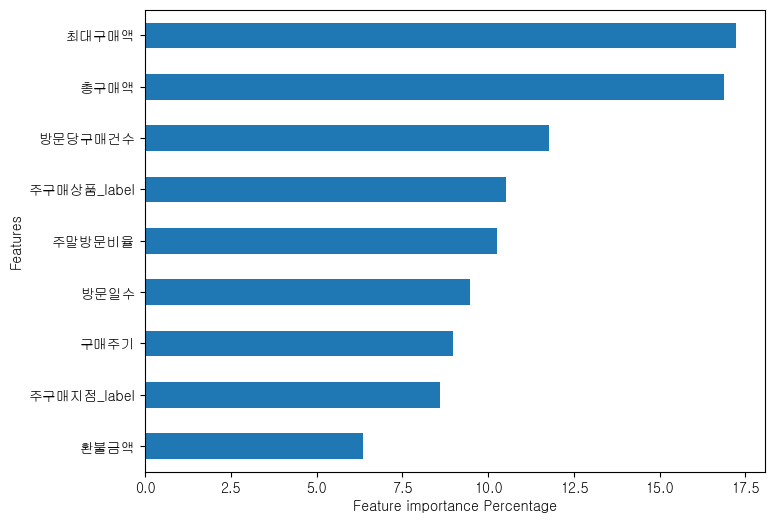

In [14]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True)

#### [참고] 확률값 예측하기

In [15]:
# Visual Python: Machine Learning > Fit/Predict
pred_prob = model.predict_proba(X_test)
pred_prob

array([[0.76, 0.24],
       [0.65, 0.35],
       [0.3 , 0.7 ],
       ...,
       [0.69, 0.31],
       [0.46, 0.54],
       [0.63, 0.37]])

---

In [16]:
# End of file